In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from pandas import Series, DataFrame
%matplotlib inline


In [2]:
loans_data= pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')

In [3]:
loans_data.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [4]:
loans_data['Loan.Length'][0:10]

81174    36 months
99592    36 months
80059    60 months
15825    36 months
33182    36 months
62403    36 months
48808    36 months
22090    60 months
76404    36 months
15867    36 months
Name: Loan.Length, dtype: object

In [5]:
loans_data['Interest.Rate'][0:10]

81174     8.90%
99592    12.12%
80059    21.98%
15825     9.99%
33182    11.71%
62403    15.31%
48808     7.90%
22090    17.14%
76404    14.33%
15867     6.91%
Name: Interest.Rate, dtype: object

In [6]:
loans_data['FICO.Range'][0:10]

81174    735-739
99592    715-719
80059    690-694
15825    695-699
33182    695-699
62403    670-674
48808    720-724
22090    705-709
76404    685-689
15867    715-719
Name: FICO.Range, dtype: object

In [7]:
loans = pd.read_csv('loan.csv')

In [8]:
loans.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670,36,4891.67,6000
11,19.72,670,36,3575.00,2000
12,14.27,665,36,4250.00,10625
13,21.67,670,60,14166.67,28000
21,21.98,665,36,6666.67,22000


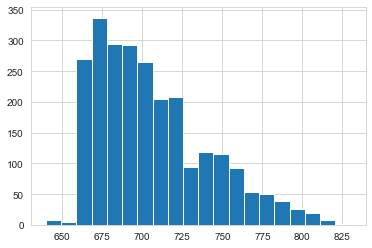

In [9]:
plt.figure()

loans = pd.read_csv('loan.csv')
fico = loans['FICO.Score']
fico.hist(bins = 20)

Text(0, 0.5, 'Inter rate in %')

<Figure size 432x288 with 0 Axes>

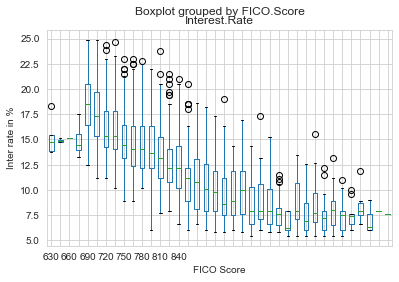

In [10]:
plt.figure()
loans = pd.read_csv('loan.csv')

x = loans.boxplot('Interest.Rate', 'FICO.Score')
x.set_xticklabels(['630', ' ', '660', ' ', '690', ' ', '720', ' ', '750', ' ', '780', ' ', '810', ' ', '840'])
x.set_xlabel("FICO Score")
x.set_ylabel("Inter rate in %")
#set_title

# scatterplot matrix

In [11]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D254199C88>,
      dtype=object)

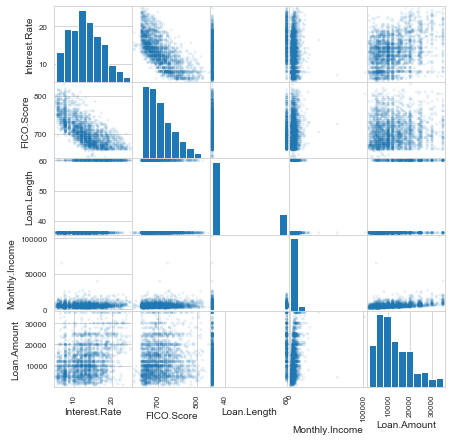

In [12]:
loans = pd.read_csv('loan.csv')
pd.plotting.scatter_matrix(loans, alpha = 0.1, figsize = (7,7), diagonal = 'hist')

# Analysis: multivariate linear regression

In [13]:
import statsmodels.api as sm

In [14]:
 dframe = pd.read_csv('loan.csv')

In [15]:
int_rate = dframe['Interest.Rate']
loan_amt = dframe['Loan.Amount']
fico_score = dframe['FICO.Score']

In [16]:
y = np.matrix(int_rate).transpose()
x1 = np.matrix(loan_amt).transpose()
x2 = np.matrix(fico_score).transpose()

In [17]:
x = np.column_stack([x1,x2])

In [18]:
x3 = sm.add_constant(x)

In [19]:
#OLS

In [20]:
model = sm.OLS(y,x3)

In [21]:
model_fit = model.fit()

In [22]:
print("the P values are: ", model_fit.pvalues)
print("the R- squared value is: ", model_fit.rsquared)  #2 techinques use to regress line appr the data

the P values are:  [0.00000000e+000 5.96972978e-203 0.00000000e+000]
the R- squared value is:  0.6566326246493588
